In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [2]:
data = pd.read_excel("code_card_data.xlsx")
data = data.drop_duplicates(subset=data.columns[:54].tolist())
data = data.to_numpy()
print(len(data))

10475


In [39]:
data1 = data[:,:]
X = data1[:2000, :55]
y = data1[:2000, 55].astype(int)
num_classes = len(np.unique(y))
y_ = to_categorical(y, num_classes=num_classes)
print(len(X))

2000


In [40]:
X_train_, X_test_, y_train, y_test = train_test_split(X, y_, test_size=0.1, random_state=1, stratify=y)
X_train = X_train_[:, :54]
X_test = X_test_[:, :54]
X_test_app = X_test_[:, 54]
print(len(X_train))

1800


In [41]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [42]:
model = Sequential([
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
])

In [43]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
accuracy6 = []
for j in range(50):
    history = model.fit(X_train, y_train, epochs=1, batch_size=16, validation_split=0.1, verbose=1)
    y_pred_proba = model.predict(X_test)
    y_pred = np.argmax(y_pred_proba, axis=1)
    y_true = np.argmax(y_test, axis=1)
    k1 = 0
    k2 = 0
    for i in range(len(y_true)):
        if y_true[i]!=y_pred[i]:
            a = y_true[i] - X_test_app[i]
            b = y_pred[i] - X_test_app[i]
            if abs(a)>0.7 or abs(b)>0.7:
                k1+=1
        k2+=1
    accuracy6.append(1-k1/len(y_true))

102/102 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3598 - loss: 1.4114 - val_accuracy: 0.4056 - val_loss: 1.1859
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5106 - loss: 1.1011 - val_accuracy: 0.4944 - val_loss: 1.0592
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5461 - loss: 1.0190 - val_accuracy: 0.5444 - val_loss: 0.9356
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6106 - loss: 0.9034 - val_accuracy: 0.5944 - val_loss: 0.8676
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6427 - loss: 0.8154 - val_accuracy: 0.5944 - val_loss: 0.8500
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6457 - loss: 0.8037 - val_accuracy: 0.6222 - val_loss: 0.8066
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
102/102 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6654 - loss: 0.

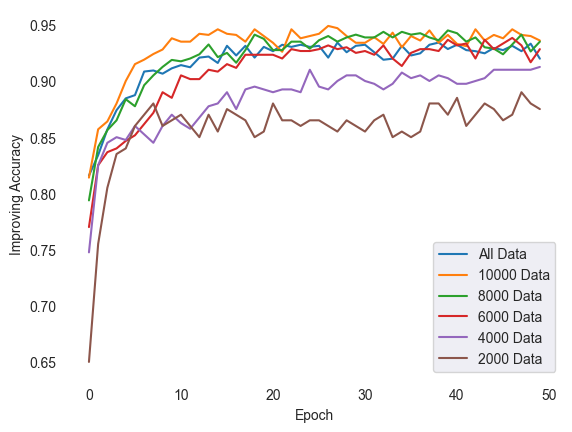

In [51]:

plt.plot(accuracy3)
plt.plot(accuracy2)
plt.plot(accuracy1)
plt.plot(accuracy4)
plt.plot(accuracy5)
plt.plot(accuracy6)
# plt.title('Coding Data')
plt.ylabel('Improving Accuracy')
plt.xlabel('Epoch')
plt.legend(['All Data', '10000 Data', '8000 Data', '6000 Data', '4000 Data', '2000 Data'], loc='lower right')
plt.box(False)
plt.savefig('1.png', dpi=300, bbox_inches='tight')

plt.show()



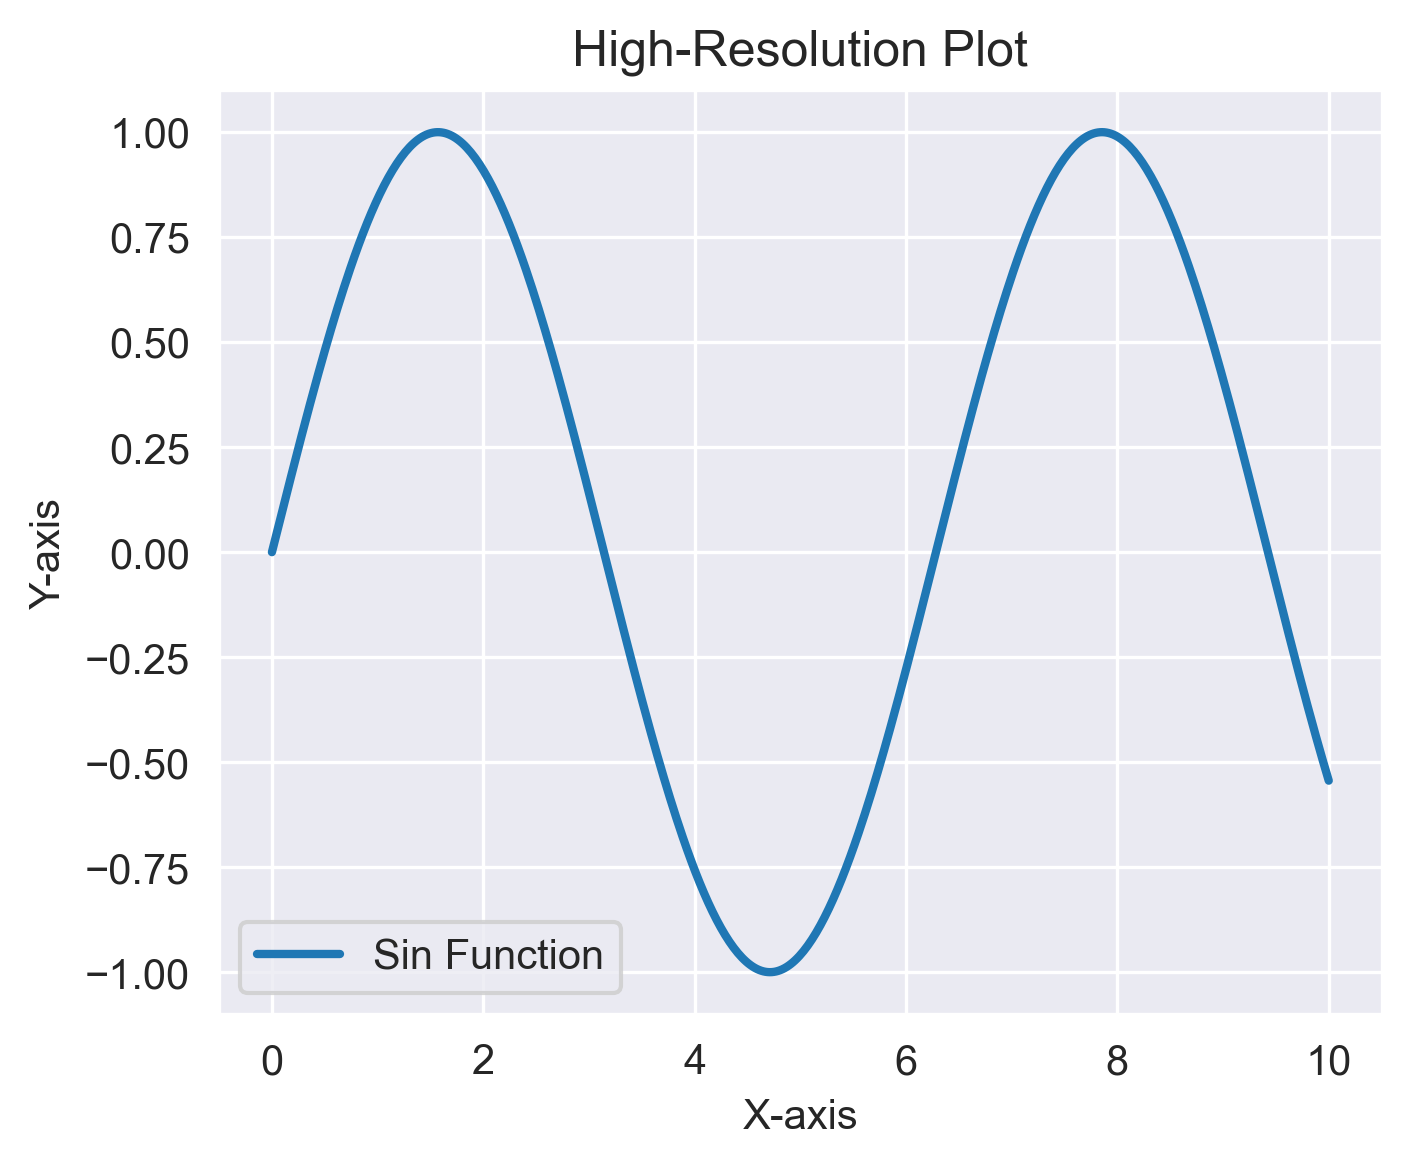

In [50]:

# 设置高分辨率（DPI）和图像大小
fig, ax = plt.subplots(figsize=(5, 4), dpi=300)

# 生成示例数据
x = np.linspace(0, 10, 500)
y = np.sin(x)

# 绘制示意图
ax.plot(x, y, label='Sin Function', linewidth=2)
ax.set_title('High-Resolution Plot')
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.legend()

# 保存高清图片
plt.savefig('high_quality_plot.png', dpi=300, bbox_inches='tight')

# 展示图片（可选）
plt.show()
